# Chapter 4 Tutorial

In this tutorial, we use Twitter data to create and explore directed networks of social interactions.

This tutorial has been updated to use the Twitter API v2 instead of v1.

Contents:

1. Twitter API basics
2. Twitter Search API
3. Social Network Graphs


# 1 Twitter API Basics

In order to get Twitter data using their API, one must first have a Twitter app. This doesn't mean that we are creating an application to run on mobile or desktop computers. Creating a Twitter app requires access to Twitter's developer platform, which requires an application process with Twitter. 

Go to this [step-by-step guide](https://dev.to/suhemparack/a-guide-to-teaching-with-the-twitter-api-v2-3n08) and follow the instructions for **essential access** for students, unless you already have a developer account. 

Once you have access, you can create a project, set up the app, and generate keys and tokens.

## 1.1 Authentication

Twitter uses OAuth in order to allow third-party apps to access data on your behalf without requiring your Twitter login credentials -- note that none of the code in this notebook asks for your Twitter screen name or password.

In this tutorial you will need a bearer token, which you can generate and copy from your Twitter [developer account page](https://developer.twitter.com/en/portal/petition/essential/basic-info). Look for something like this under keys and tokens for you app:

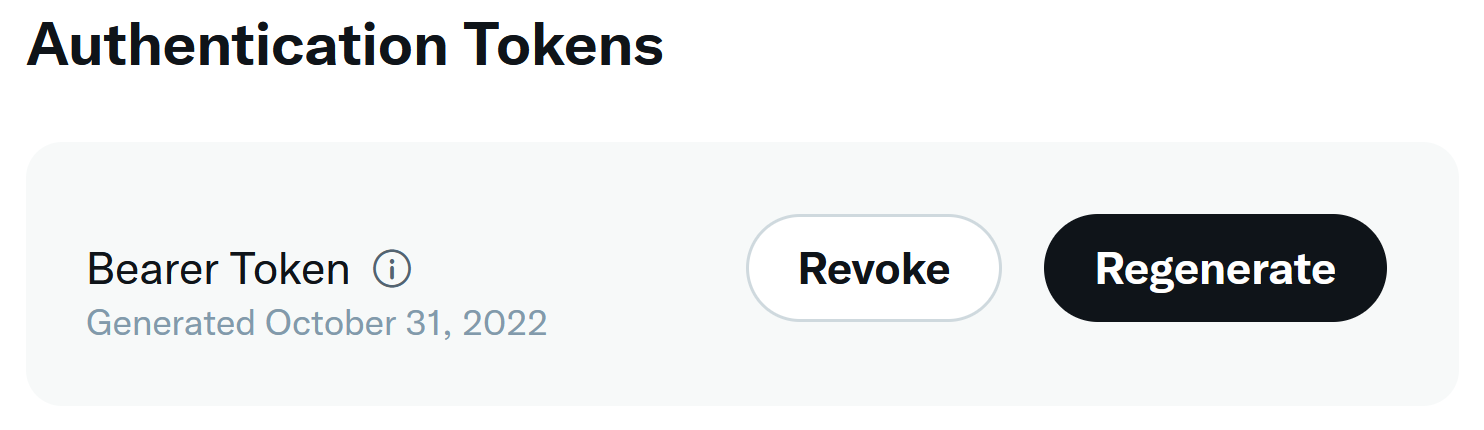

## 1.2 Twarc2

We are going to use [Twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/) for interacting with the Twitter API. Here is how you install it:

In [ ]:
!pip install --upgrade twarc

We will use two methods from this package:

In [ ]:
from twarc.client2 import Twarc2
from twarc.expansions import flatten

Here is how you create a new Twarc2 client instance using your bearer token (generate or regenerate the barer token from your app page, copy it, and paste it below):

In [ ]:
# Do not share your bearer token with others!
bearer_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
client = Twarc2(bearer_token=bearer_token)

## 1.3 User Objects

The first type of data of which we will make use is the
[User Object](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user).
A user object actually contains all the information about the user:

In [ ]:
# This is to make json objects easier to read
from pprint import pprint

In [ ]:
# User lookup takes a list of user IDs or handles and returns an iterator of search pages. Each search page has at most 100 results
search_pages = client.user_lookup(users=['OSoMe_IU'], usernames=True)

# In our case we have a single page
page = list(search_pages)[0]

# flatten() is a twarc2 function that converts a page of results into a list of consolidated json objects
# In our case the page contains a single user object
user = flatten(page)[0]

pprint(user)

{'__twarc': {'retrieved_at': '2022-11-02T22:30:30+00:00',
             'url': 'https://api.twitter.com/2/users/by?tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld%2Cedit_controls&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&usernames=OSoMe_IU',
             'version': '2.12.0'},
 'created_at': '2010-09-06T13:31:27.000Z',
 'description': 'The Observatory on Social Media (awe•some) is a research '
                'center at Indiana University to study the spread of '
                'misinformation. Tweets by Fil Menczer & OSoMe Team',
 'entities': {'url': {'urls': [{'display_url': 'osome.iu.edu',
                                'end': 23,
                            

This dictionary of user data contains several items of note, and we can access them the way we typically access dictionary items:

In [ ]:
username = user['username']
followers_count = user['public_metrics']['followers_count']
following_count = user ['public_metrics']['following_count']
tweet_count = user['public_metrics']['tweet_count']

print(f"Twitter user @{username} has {followers_count} followers, follows {following_count} users, and has tweeted {tweet_count} times.")

## 1.4 Tweet Objects

The second type of data of which we will make use is the
[Tweet Object](https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet).
Let us look at one of the most viral tweets of all time:
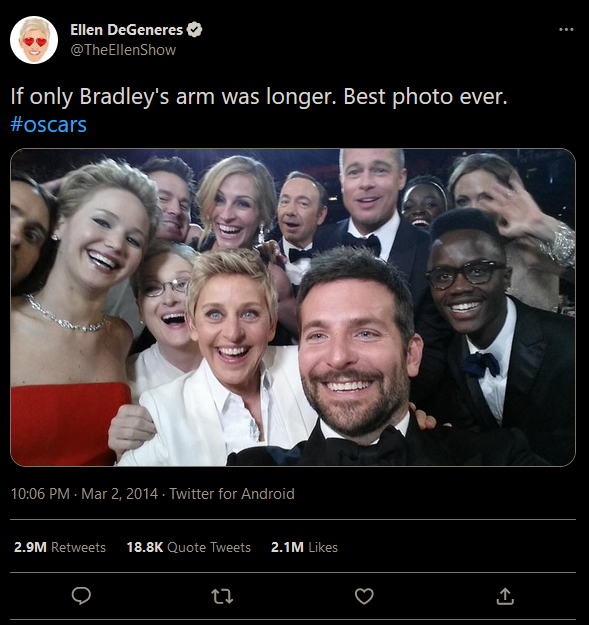

Let us retrieve this tweet and look at its object. Notice that this is a more complex object. It also contains the user object of the author of the tweet. This is why the `flatten()` function is useful, as it consolidates all this data into a single json object:

In [ ]:
# The id of Ellen's viral tweet
ellen_tweet_id = '440322224407314432'

# The id of another tweet, by our OSoMe account
osome_tweet_id = '1176676441666347008'

# Tweet lookup takes a list of tweet IDs and returns an iterator of search pages. Each search page has at most 100 results
search_pages = client.tweet_lookup(tweet_ids=[ellen_tweet_id, osome_tweet_id])

# In our case we have a single page
page = list(search_pages)[0]

# flatten() is a twarc2 function that converts a page of results into a list of consolidated json objects
# In our case the page contains two tweet objects
tweets = flatten(page)
ellen_tweet, osome_tweet = tweets

pprint(ellen_tweet)

{'__twarc': {'retrieved_at': '2022-11-02T22:30:43+00:00',
             'url': 'https://api.twitter.com/2/tweets?expansions=author_id%2Cin_reply_to_user_id%2Creferenced_tweets.id%2Creferenced_tweets.id.author_id%2Centities.mentions.username%2Cattachments.poll_ids%2Cattachments.media_keys%2Cgeo.place_id%2Cedit_history_tweet_ids&tweet.fields=attachments%2Cauthor_id%2Ccontext_annotations%2Cconversation_id%2Ccreated_at%2Centities%2Cgeo%2Cid%2Cin_reply_to_user_id%2Clang%2Cpublic_metrics%2Ctext%2Cpossibly_sensitive%2Creferenced_tweets%2Creply_settings%2Csource%2Cwithheld%2Cedit_controls&user.fields=created_at%2Cdescription%2Centities%2Cid%2Clocation%2Cname%2Cpinned_tweet_id%2Cprofile_image_url%2Cprotected%2Cpublic_metrics%2Curl%2Cusername%2Cverified%2Cwithheld&media.fields=alt_text%2Cduration_ms%2Cheight%2Cmedia_key%2Cpreview_image_url%2Ctype%2Curl%2Cwidth%2Cpublic_metrics&poll.fields=duration_minutes%2Cend_datetime%2Cid%2Coptions%2Cvoting_status&place.fields=contained_within%2Ccountry%2Ccoun

Tweet objects contain several interesting data and metadata, but the most basic are the `text` and `entities`. The `text` is what you expect it to be, the content of the tweet:

In [ ]:
ellen_tweet['text']

"If only Bradley's arm was longer. Best photo ever. #oscars http://t.co/C9U5NOtGap"

The `entities` field contains several tokens of interest already extracted from the tweet such as hashtags, URLs, images, and mentions of other users:

In [ ]:
ellen_tweet['entities']

{'hashtags': [{'start': 51, 'end': 58, 'tag': 'oscars'}],
 'urls': [{'start': 59,
   'end': 81,
   'url': 'http://t.co/C9U5NOtGap',
   'expanded_url': 'https://twitter.com/TheEllenShow/status/440322224407314432/photo/1',
   'display_url': 'pic.twitter.com/C9U5NOtGap',
   'media_key': '3_440322224092745728'}],
 'annotations': [{'start': 8,
   'end': 14,
   'probability': 0.7889,
   'type': 'Person',
   'normalized_text': 'Bradley'},
  {'start': 52,
   'end': 57,
   'probability': 0.7828,
   'type': 'Other',
   'normalized_text': 'oscars'}]}

The OSoMe tweet contains different entities, like `mentions`:

In [ ]:
osome_tweet['entities']

{'annotations': [{'start': 4,
   'end': 14,
   'probability': 0.4464,
   'type': 'Other',
   'normalized_text': 'Observatory'},
  {'start': 26,
   'end': 30,
   'probability': 0.4604,
   'type': 'Other',
   'normalized_text': 'Media'},
  {'start': 33,
   'end': 37,
   'probability': 0.4265,
   'type': 'Other',
   'normalized_text': 'OSoMe'},
  {'start': 85,
   'end': 102,
   'probability': 0.9889,
   'type': 'Organization',
   'normalized_text': 'Indiana University'},
  {'start': 261,
   'end': 265,
   'probability': 0.4653,
   'type': 'Other',
   'normalized_text': 'Hoaxy'},
  {'start': 273,
   'end': 281,
   'probability': 0.7221,
   'type': 'Other',
   'normalized_text': 'BotSlayer'}],
 'mentions': [{'start': 249,
   'end': 259,
   'username': 'Botometer',
   'id': '2451308594',
   'name': 'Botometer',
   'public_metrics': {'followers_count': 12068,
    'following_count': 128,
    'tweet_count': 1758,
    'listed_count': 165},
   'entities': {'url': {'urls': [{'start': 0,
       'en

We'll make use of the `mentions` later.

Considering that this is a nested dictionary, the code below prints out the list of `mentions` in the `osome_tweet`.

(*Note*: Not every Tweet has user mentions. What happens when you try to print the `mentions` in the `ellen_tweet`?)

In [ ]:
for m in osome_tweet['entities']['mentions']:
    print(m['username'], 'mentioned by', osome_tweet['author']['username'])

In [ ]:
# This produces an error because there are no mentions
for m in ellen_tweet['entities']['mentions']:
    pprint(m['username'])

In [ ]:
# This works because we check first
if 'mentions' in ellen_tweet['entities']:
    for m in ellen_tweet['entities']['mentions']:
        print(m['username'], 'mentioned by', ellen_tweet['author']['username'])
else:
    print('No mentions by', ellen_tweet['author']['username'])

# 2 Twitter Search API

Twitter's
[Search API](https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction)
allows you to fetch recent tweets according to a query of keywords, URLs, hashtags, user mentions, etc.

Let's search for about 1000 recent tweets matching a hashtag. By default each page has at most 100 results. So we have to loop over the pages, which will send multiple API requests. This may take a few seconds...

In [ ]:
pages = client.search_recent('#Science')

search_tweets = []

for page in pages:
    search_tweets += flatten(page)
    if len(search_tweets) >= 1000:
        break

In [ ]:
len(search_tweets)

1000

Let's look at the authors of the first and the last tweet:

In [ ]:
# First Author
pprint(search_tweets[0]['author']['username'])

# Last Author
pprint(search_tweets[-1]['author']['username'])

# 3 Social Network Graphs

In this section of the tutorial, we're going to use NetworkX to create social networks from Twitter data. The examples are going to have users as nodes.

We can build various kinds of networks from tweets, based on retweets, quotes or replies. We can find these references among tweets in the `referenced_tweets` field. 

## 3.1 Quotes

Here is an example for selecting tweets that quote other tweets:

In [ ]:
for tweet in search_tweets:
    # check if the tweet has references
    if 'referenced_tweets' in tweet:

        # tweet could reference one or more tweets
        for ref_tweet in tweet['referenced_tweets']:

            # check the type of reference
            if ref_tweet['type'] == 'quoted':
                print(
                    f"Tweet {tweet['id']} by @{tweet['author']['username']} is quoting tweet {ref_tweet['id']} by @{ref_tweet['author']['username']}."
                )

## 3.2 Retweet Network

Now let's do something similar for retweets and actually create the directed network among the users based on the retweets.

In [ ]:
import networkx as nx

We're going to draw edges in the direction of information flow: from the retweeted user to the retweeter, the user doing the retweeting. Since a user can retweet another user more than once, we want this graph to be weighted, with the number of retweets as the weight.

In [ ]:
# initialize directed network
D = nx.DiGraph()

for tweet in search_tweets:
    # check if the tweet has references
    if 'referenced_tweets' in tweet:

        # tweet could reference one or more tweets
        for ref_tweet in tweet['referenced_tweets']:

            # check the type of reference
            if ref_tweet['type'] == 'retweeted':

                # author of tweet
                retweeter_user = tweet['author']['username']

                # author of referenced tweet
                retweeted_user = ref_tweet['author']['username']

                # adding edge to the graph
                if D.has_edge(retweeted_user, retweeter_user):
                    D.edges[retweeted_user, retweeter_user]['weight'] += 1
                else:
                    D.add_edge(retweeted_user, retweeter_user, weight=1)

print(f'The retweet network has {D.number_of_nodes()} nodes and {D.number_of_edges()} edges.')

## 3.3 Analyzing the Retweet Network

Now that we have the retweet network, let's ask some questions about it.

### Influential Users

Since the edges are in the direction of information flow, out-degree gives us the number of other users retweeting a given user. We can get the user with highest out-degree using the built-in `max` function:

In [ ]:
max(D.nodes, key=D.out_degree)

We can get more context from the "top N" users:

In [ ]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

In this piece of code, we take advantage of the fact that `D.out_degree()` returns a sequence of `(name, degree)` 2-tuples; specifying `key=itemgetter(1)` tells the `sorted` function to sort these 2-tuples by their value at index 1. Giving `reverse=True` tells the `sorted` function that we want this in descending order, and the `[:5]` at the end slices the first 5 items from the resulting list.

However, this is a weighted graph! By default, `out_degree()` ignores the edge weights. We can get out-strength by telling the `out_degree()` function to take into account the edge weight:

In [ ]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

In some cases these two results will be the same, namely if none of these users has been retweeted multiple times by the same user. Depending on your use case, you may or may not wish to take the weights into account.

### Anomaly Detection

One type of social media manipulation involves accounts that create very little original content, instead "spamming" retweets of any and all content in a particular conversation. Can we detect any users doing significantly more retweeting than others? Let's look at the top N retweeters:

In [ ]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

### Connectivity

We can ask if the tweets obtained by the search represent one large conversation or many small conversations; broadly speaking, each weakly-connected component represents a conversation.

In [ ]:
nx.is_weakly_connected(D)

In [ ]:
nx.number_weakly_connected_components(D)

### Drawing

We can try to draw this graph with the nodes sized by their out-strength:

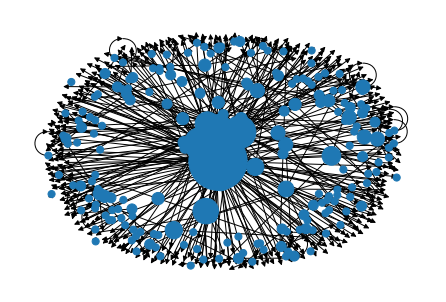

In [ ]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

nx.draw(D, node_size=node_sizes)

Note that in this simplistic drawing, nodes with zero out-strength are not drawn on the diagram because their size is 0. This suits us fine; only the users who have been retweeted are drawn here.

## 3.4 Twitter Mention Network

Another Twitter interaction between users occurs when one user mentions another in a tweet by their @screen_name. As an example, consider the following hypothetical tweet from @osome_iu):

> Check out the new research from @IULuddy and @USC_ISI https://...

From this tweet we would create two edges:

    ('OSoMe_IU', 'IULuddy')
    ('OSoMe_IU', 'USC_ISI')

It's up to us which direction we draw these edges, but we should be consistent. In this example, we will draw edges in the direction of attention flow: @osome_iu is giving attention to @IULuddy and @USC_ISI.

Let us use the same tweets we retrieved from our previous search and make use of `entities` field to retrieve mentioned users.

In [ ]:
M = nx.DiGraph()

# iterating through the searched_tweets
for tweet in search_tweets:

    # checking if mentions exist in entities
    if 'mentions' in tweet['entities']:

        # iterating through the mentions
        for mention in tweet['entities']['mentions']:

            # author of tweet
            mentioner = tweet['author']['username']

            # mentioned user
            mentioned = mention['username']

            # adding edge to the graph
            if M.has_edge(mentioner, mentioned):
                M.edges[mentioner, mentioned]['weight'] += 1
            else:
                M.add_edge(mentioner, mentioned, weight=1)

print(f'The mention network has {M.number_of_nodes()} nodes and {M.number_of_edges()} edges.')

## 3.5 Analyzing the Mention Network

Now that we have this graph, let's ask some questions about it.

### Popular Users

Since these edges are in the direction of attention flow, in-degree gives us the number of other users mentioning a given user. We can get the user with highest in-degree using the built-in `max` function:

In [ ]:
max(M.nodes, key=M.in_degree)

We can get more context from the "top N" users:

In [ ]:
from operator import itemgetter

sorted(M.in_degree(), key=itemgetter(1), reverse=True)[:5]

By specifying `weight='weight'` we can instead get the top 5 users by in-strength instead of in-degree:

In [ ]:
sorted(M.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

In some cases these two results will be the same, namely if none of these users has been mentioned multiple times by the same user. Depending on your use case, you may or may not wish to take the weights into account.

In addition, note that when user A retweets user B, the API also reports user A mentioning user B. Therefore, you may observe that the most mentioned users may be similar to the most retweeted users.

### Conversation Drivers

A user mentioning many others in a conversation may be "driving" the conversation and trying to include others in the dialogue. It could also be spam. Let's see who is doing the most mentioning here:

In [ ]:
sorted(M.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

### Connectivity

We can ask if the tweets obtained by the search represent one large conversation or many small conversations; broadly speaking, each weakly-connected component represents a conversation.

In [ ]:
nx.is_weakly_connected(M)

In [ ]:
nx.number_weakly_connected_components(M)

### Drawing

We can try to draw this graph with the nodes sized by their in-strength:

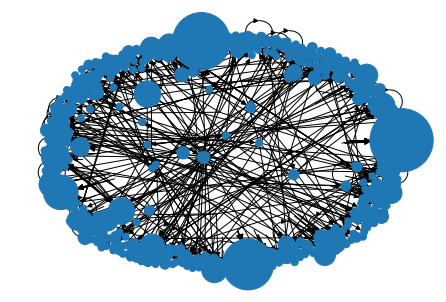

In [ ]:
node_sizes = [M.in_degree(n, weight='weight') * 50 for n in M.nodes]

nx.draw(M, node_size=node_sizes)

Note that in this simplistic drawing, nodes with zero in-strength are not drawn on the diagram because their size is 0. This suits us fine; only the users who have been mentioned are drawn here.

## 3.6 Try This: Reply Network

Of the tweets we fetched, a subset will be replies. *If* a tweet is a reply, it will have `referenced_tweets` as a field and the `type` of the referenced tweet will be `replied_to`.

Write code to loop through `search_tweets` and construct a reply network. Make sure to be consistent with the edge direction. How many nodes and edges does the reply network have?

Hint: if a `replied_to` tweet was deleted, its JSON object will only have an `id` and `type`, nothing else. To avoid errors due to this, your code should check for these cases and skip them.